In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\prave\\OneDrive\\Desktop\\Git\\MachineLearning\\Datasets\\homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


1. One-hot encodign using get_dummies method to deal with the text objects 

In [3]:
# assigning one-hot encoding to words

dummies = pd.get_dummies(df.town,dtype=int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
data = pd.get_dummies(df,dtype=int)
data

,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [5]:
pd.concat([df,dummies],axis='columns')

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [6]:
data.columns


Index(['area', 'price', 'town_monroe township', 'town_robinsville',
       'town_west windsor'],
      dtype='object')

In [7]:
# we need to drop one of the dummies coloumn to avoid multi colinearity that creates dummy vlaues traps

data = data.drop(['town_west windsor'], axis='columns')


In [8]:
data

,area,price,town_monroe township,town_robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [9]:
x = data.drop(['price'],axis=1)

In [10]:
print(x.ndim)
x

2


,area,town_monroe township,town_robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [11]:
y = data.price
print(y.ndim)
y

1


0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_model = LinearRegression()

In [14]:
lin_model.fit(x,y)

LinearRegression()

In [15]:
y_pred = lin_model.predict(x)
y_pred

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [16]:
print(y_pred.ndim)

pd.DataFrame({'actual': y,'predicted':y_pred})

1


,actual,predicted
0,550000,539709.739841
1,565000,590468.716405
2,610000,615848.204687
3,680000,666607.181251
4,725000,717366.157816
5,585000,579723.715330
6,615000,605103.203612
7,650000,668551.924317
8,710000,706621.156740
9,575000,565396.151365


In [17]:
lin_model.predict([[2400,1,0]])

C:\Users\prave\anaconda3\envs\tensorFlow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([514330.25155882])

In [18]:
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
r2_score(y,y_pred)

0.9573929037221872

In [20]:
mean_squared_error(y,y_pred)

130581926.13664564

In [21]:
lin_model.score(x,y)

0.9573929037221872

In [22]:
print("coef:" ,lin_model.coef_)
print("intercept:" ,lin_model.intercept_)

coef: [   126.89744141 -40013.97548914 -14327.56396474]
intercept: 249790.36766292521


Text(0, 0.5, 'predicted price')

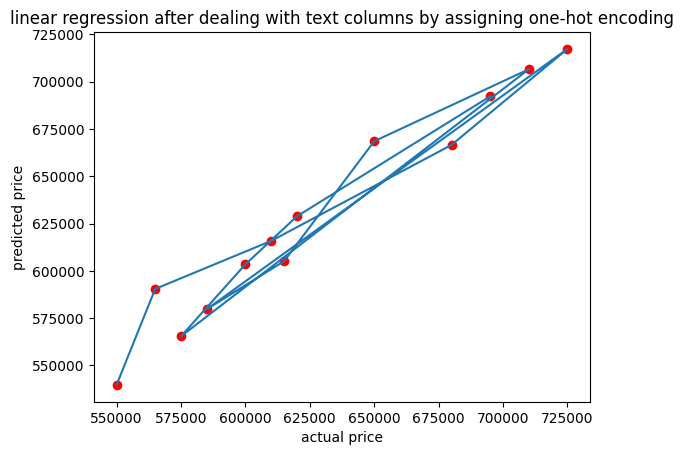

In [23]:
import matplotlib.pyplot as plt
plt.title("linear regression after dealing with text columns by assigning one-hot encoding")
plt.scatter(y,y_pred,c='r')
plt.plot(y,y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")

2. Label Encoding to do One-hot encoding

In [24]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
dfle = df


In [28]:
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [29]:
x = dfle[['town','area']]
y = dfle['price']

In [30]:
print(x.ndim)
print(y.ndim)

2
1


now label encoders to one hot encoding

In [31]:
dfle


,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [32]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), [0])
    ],
    remainder='passthrough'
)

x = ct.fit_transform(x)


In [51]:
x_t = x

In [52]:
print(x_t.shape)
x_t   #4 columns


(13, 4)


array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [55]:

x_t = x_t[:,1:]

print(x_t.shape)   #3 columns
print(x_t)

(13, 3)
[[0.0e+00 0.0e+00 2.6e+03]
 [0.0e+00 0.0e+00 3.0e+03]
 [0.0e+00 0.0e+00 3.2e+03]
 [0.0e+00 0.0e+00 3.6e+03]
 [0.0e+00 0.0e+00 4.0e+03]
 [0.0e+00 1.0e+00 2.6e+03]
 [0.0e+00 1.0e+00 2.8e+03]
 [0.0e+00 1.0e+00 3.3e+03]
 [0.0e+00 1.0e+00 3.6e+03]
 [1.0e+00 0.0e+00 2.6e+03]
 [1.0e+00 0.0e+00 2.9e+03]
 [1.0e+00 0.0e+00 3.1e+03]
 [1.0e+00 0.0e+00 3.6e+03]]


In [56]:
model = LinearRegression()

In [60]:
model.fit(x_t,y)

LinearRegression()

In [64]:
model.predict([[0,1,2400]])

array([554344.22704795])